# Notebook Value function iteration

In this jupyter notebook we apply the value function iteration method to some examples.

We start with the cake eating example For this example the exact value function is known. Thus we can compare the approximated value function with the exact one. 

## 1. Cake eating

Recall that the value function in the cake eating example is given by 

\begin{align}
V(x) = (1- \alpha^{\frac{1}{\gamma}} ) ^{-\gamma} \frac{x^{1-\gamma}}{1-\gamma} 
\end{align}

(see Section 3.2). The following Python code introduces the function into our notebook: 

In [1]:
def U(x):
    return x**(1-gamma)/(1-gamma)

def value_fct_cake_eating(x):
    return (1-alpha**(1/gamma))**(-gamma)*U(x)

We now plot the value function for the parameters $\alpha = 0.9$ and $\gamma = \frac12$. 

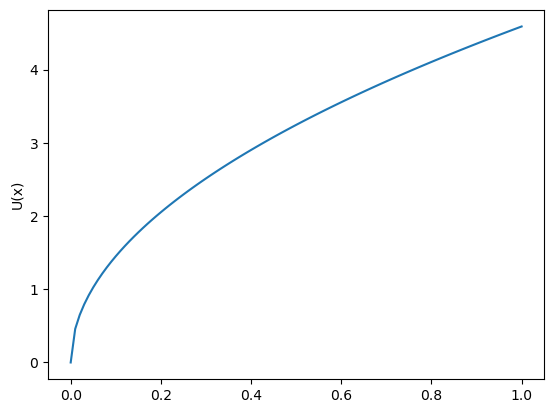

In [3]:
import numpy as np
import matplotlib.pyplot as plt


gamma=0.5
alpha=0.9

x = np.linspace(0,1,101)

plt.plot(x,value_fct_cake_eating(x))
plt.ylabel('U(x)')
plt.show()

### Value function iteration

In order to apply the value function iteration method to the cake eating example, we need to discretize the problem. To this end we partition the cake with initial size $\bar x$ into $n$ pieces with equal size $\Delta = \frac{\bar x}{n}$. We set $x_i = i * \Delta$ for all $i \in \{0,1, \ldots, n\}$. The state space of the discretized problem is $\{x_0, x_1, \ldots, x_n\}$. We also need to discretize the action space. We set $A(x_i) = \{j*\Delta: 0 \le j \le i\}$. 

After the discretization the value function can be represented as a vector of length $n+1$. The corresponding Bellman operator $T$ (see operator $T$ defined in Equation (17) of the script) acts on $\mathbb{R}^{n+1}$ and maps a vector $v = (v_0, \ldots, v_n)$ onto the vector $Tv$ given by 

\begin{align*}
(Tv)(i) = \max_{0 \le j \le i} \{U(j \Delta) + \alpha * v(i-j)\} 
\end{align*}

for $i \in \{0,1, \ldots, n\}$. 

The code for the discretized Bellman operator is as follows:  

In [4]:
def bellman_op(v):
    n = np.size(v)
    v_new = np.zeros(n)
    for i in range(1,n):
        for j in range(i+1):
          v_new[i] = max(v_new[i], U(j*Delta)+alpha*v[i-j])
    return v_new

By applying the function `bellman_op` consecutively to some initial vector in $\mathbb{R}^{n+1}$ we obtain a sequence converging to the value function of the discretized problem (see Proposition 3.13). In the following code we apply the operator 10 times to the zero vector. 

In [5]:
xbar = 1
n = 100
Delta = xbar/n

niter = 10

val_fct = np.zeros(n+1)

for t in range(niter):
    val_fct = bellman_op(val_fct)

We now compare the vector obtained after 10 steps with the value function of the original problem. 

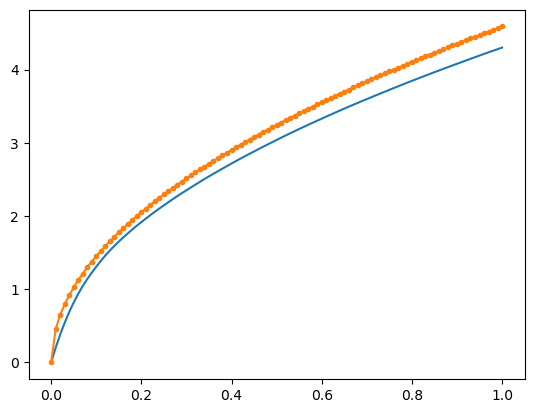

In [6]:
plt.plot(x,val_fct,x,value_fct_cake_eating(x),'.-')
plt.ylabel('U(x)')
plt.show()

The difference of the exact value for $\bar x = 1$ and the approximated one is given by 

In [7]:
abs(val_fct[n]-value_fct_cake_eating(1))

0.28850621388300013

**Exercise 1.** 

a) Apply the function `bellman_op` 100 times to the zero vector and compare again the approximate value function of the discretized problem with the true value function of the original problem. 

b) Discretize with $n = 200$ and apply the $100$ iterations of the Bellman operator. Compare again the approximate value function with the true value function of the original problem.

a)

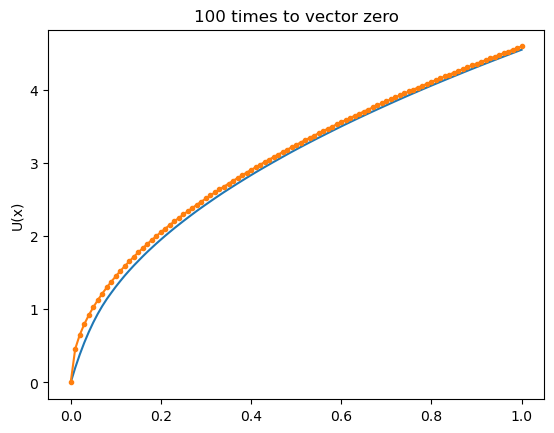

0.04443966635609886

In [10]:
xbar = 1
n = 100
Delta = xbar/n

niter = 100

val_fct = np.zeros(n+1)

for t in range(niter):
    val_fct = bellman_op(val_fct)
    
plt.plot(x,val_fct,x,value_fct_cake_eating(x),'.-')
plt.title("100 times to vector zero")
plt.ylabel('U(x)')
plt.legend
plt.show()

abs(val_fct[n]-value_fct_cake_eating(1))

We observe that the error has reduced and is now equals to only 4.4%

b)

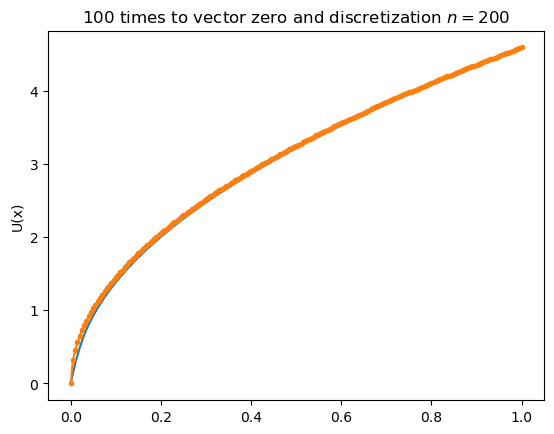

0.02220513325067852

In [13]:
x = np.linspace(0,1,201)

xbar = 1
n = 200
Delta = xbar/n

niter = 100

val_fct = np.zeros(n+1)

for t in range(niter):
    val_fct = bellman_op(val_fct)
    
plt.plot(x,val_fct,x,value_fct_cake_eating(x),'.-')
plt.title("100 times to vector zero and discretization $n=200$")
plt.ylabel('U(x)')
plt.legend
plt.show()

abs(val_fct[n]-value_fct_cake_eating(1))

The error has again been reduced and is now equals to only 2.2%

## 2. Risk taking

We now consider a Risk taking dilemma

In order to apply the value function iteration algorithm, we first modify the problem such that the state space becomes finite. Observe that for values $i$ far above zero, e.g. $i \ge 100$, we have $V(i) \approx \frac{1}{1-\alpha}$. Moreover, for values $i$ far below zero, e.g. $i \le -100$ we have $V(i) \approx 0$. 

To simplify the problem we therefore assume that state $100$ is the maximal state and state $-100$ is the minimal state. Moreover, we assume that $100$ and $-100$ are absorbing states (i.e. states that can not be left once they have been attained). We also assume that $99$ is absorbing so that by choosing action $2$ in state $99$ we can not jump to $101$. Similarly, we assume that $-99$ is absorbing. 

To sum up, the transition probabilities for arbitrary policies $\pi$ are given by 
\begin{align*}
P(\pi)_{ij} = \left\{
\begin{array}{cc}
1 & \text{ if } i=j \text{ and } i,j \in \{-100, -99, 99, 100\}, \\
\frac12 & \text{ if } |i-j| = 1 \text{ and } \pi(i)=1 \text{ and } |i| \le 98, \\
\frac12 & \text{ if } |i-j| = 2 \text{ and } \pi(i)=2 \text{ and } |i| \le 98.
\end{array}\right.
\end{align*}
There is no need to change the action space $A = \{1, 2\}$. 

A value function in the finite-state version of the problem is now a vector of length $201$. The Bellman operator $T$ acts on $\mathbb{R}^{201}$ and maps a vector $v = (v_{-100}, \ldots, v_{100})$ onto the vector $Tv$ with entries for $i \in \{-98,-97, \ldots, 97,98\}$ given by 

\begin{align*}
(Tv)(i) = 1_{[0, \infty)}(i) + \max\left\{\frac12(V(i+1)+V(i-1)), \frac12(V(i+2)+V(i-2))\right\} 
\end{align*}

and with entries for the remaining states given by $(Tv)(-100) = (Tv)(-99) = 0$, and $(Tv)(99) = (Tv)(100) = 1/(1-\alpha)$. 

**Exercise 2.**

a) Implement the Bellman operator as a python function.   

b) Use the value function iteration method for approximating the value function for $\alpha = 0.99$. Start with the zero vector and make 1000 iterations. What is the approximate value for $V(0)$? Generate a plot of the value function. 

c) Extend your code such that it also provides an (approximate) optimal policy for the states $-98, -97, \ldots, 97, 98$. Plot the optimal policy and explain what you observe. 

a)

In [1]:
import numpy as np

def bellman_operator(V, alpha):
   
    n = len(V)
    Tv = np.zeros(n)

    # Compute Tv for states -98 to 98
    for i in range(2, n-2):
        if i >=99: 
            Tv[i] = 1 + max(0.5 * (V[i+1] + V[i-1]), 0.5 * (V[i+2] + V[i-2]))
        else:
            Tv[i] = max(0.5 * (V[i+1] + V[i-1]), 0.5 * (V[i+2] + V[i-2]))
            

    # Set Tv for states -100, -99, 99, 100
    Tv[0] = Tv[1] = 0
    Tv[-2] = Tv[-1] = 1 / (1 - alpha)

    return Tv

b)

Approximate value for V(0): 684.0763303467738


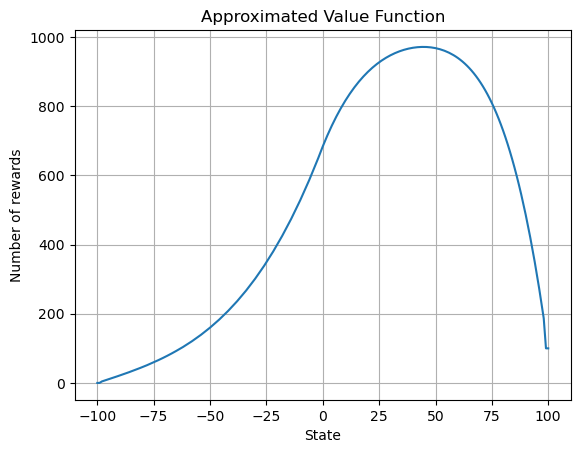

In [28]:
import matplotlib.pyplot as plt

def value_iteration(alpha, max_iterations=1000, tolerance=1e-6):
    V = np.zeros(201)  # Initial value function
    for _ in range(max_iterations):
        V_new = bellman_operator(V, alpha)
        if np.max(np.abs(V_new - V)) < tolerance:
            break
        V = V_new
    return V

# Perform value iteration
alpha = 0.99
V = value_iteration(alpha)

# Approximate value for V(0)
V_0 = V[100]

print("Approximate value for V(0):", V_0)

# Generate plot of the value function
states = np.arange(-100, 101)
plt.plot(states, V)
plt.title("Approximated Value Function")
plt.xlabel("State")
plt.ylabel("Number of rewards")
plt.grid(True)
plt.show()

c)

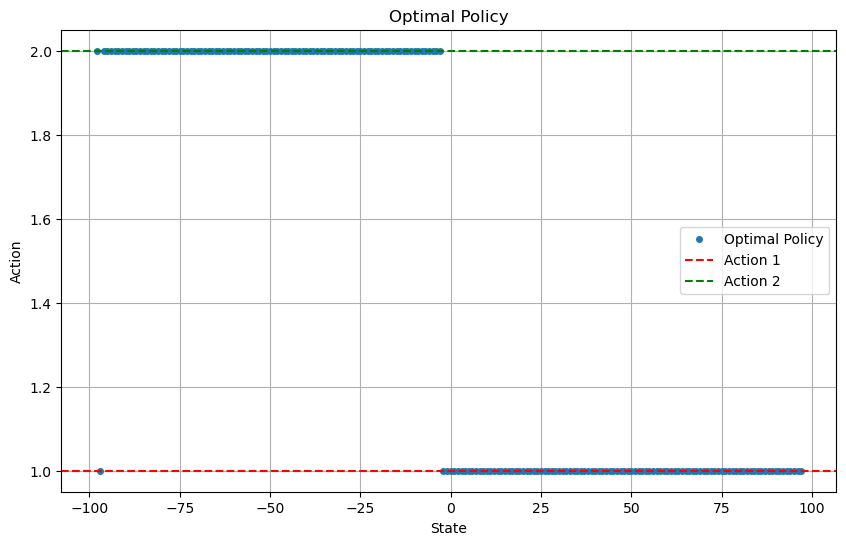

In [42]:
def find_optimal_policy(V, alpha):
    policy = np.zeros(200)
    for i in range(2, len(policy)-2):
        if max(0, 0.5 * (V[i+1] + V[i-1]), 0.5 * (V[i+2] + V[i-2])) == 0.5 * (V[i+1] + V[i-1]):
            policy[i] = 1
        else:
            policy[i] = 2
    return policy

optimal_policy = find_optimal_policy(V, alpha)

# Plot optimal policy
plt.figure(figsize=(10, 6))
plt.plot(range(-98, 98), optimal_policy[2:198], marker='o', linestyle='', markersize=4, label='Optimal Policy')
plt.xlabel('State')
plt.ylabel('Action')
plt.title('Optimal Policy')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--', label='Action 1')
plt.axhline(y=2, color='g', linestyle='--', label='Action 2')
plt.legend()
plt.show()

The optimal policy obtained is logical : if we are in a negative state we take risks to go up even if it means going further down, so we take action 2 (-2/+2). The only exception is the extreme value -97 where taking a risk of landing in the negative absorbing state is not useful so we choose the action 1 (-1/+1) rather than the  action 2. Whereas when we are in the positive we take less risk so as not to fall into the negative, therefore we choose action 1.